<a href="https://colab.research.google.com/github/karol-vann/Clase_Programaci-n/blob/main/Proyecto_Final_%C3%81rbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **$Clasificación$ $de$ $la$ $Salud$ $Fetal$**

En este estudio se realiza la clasificación de los resultados de la prueba de cardiotocograma para saber el bienestar del feto, el analisis de esta clasificación se hace a partir de los datos obtenidos de la cardiotocografía (CTG) utilizada en el embarazo para controlar las frecuencias cardiacas, monitoriar el bienestar cardíaco y detectar los riegos y padecientos fetales.

In [49]:
#Librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix


In [ ]:
#Base de datos obtenida de Kanggle y guardada en el repositorio de github
FetalHealth = pd.read_csv("https://raw.githubusercontent.com/karol-vann/bases_de_datos/main/fetal_health.csv")

In [ ]:
FetalHealth.head() # Miramos los primeros 5 datos


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
FetalHealth.info() #Revisión de variables, datos nulos y tipo de dato 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
#Filtramos las variables que se uilizaran para la clasificación
FetalHealth = FetalHealth[['fetal_health','baseline value',	'accelerations','fetal_movement',	'uterine_contractions',	'light_decelerations','severe_decelerations',	'prolongued_decelerations',	'abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability']]
FetalHealth.head()

,fetal_health,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,2.0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4
1,1.0,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4
2,1.0,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4
3,1.0,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0
4,1.0,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9


In [ ]:
#Evidenciamosla variable dependiente
ejey = FetalHealth['fetal_health'].value_counts()
ejey.describe()

count       3.000000
mean      708.666667
std       821.705746
min       176.000000
25%       235.500000
50%       295.000000
75%       975.000000
max      1655.000000
Name: fetal_health, dtype: float64

Antes de ejecutar el modelo de clasificación, ralizamos una exploración y analisis inicial de datos para entender la investigación

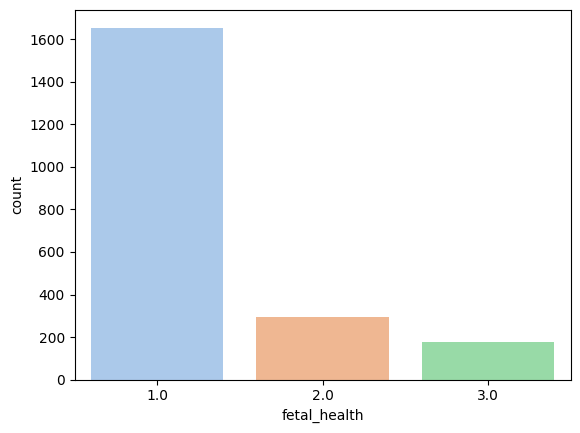

In [ ]:
color = sns.color_palette(palette = "pastel",n_colors = 21 )
g =sns.countplot(data = FetalHealth,x ='fetal_health',palette= color)
#1 Normal
#2 Sospecha
#3 Patológico


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarni

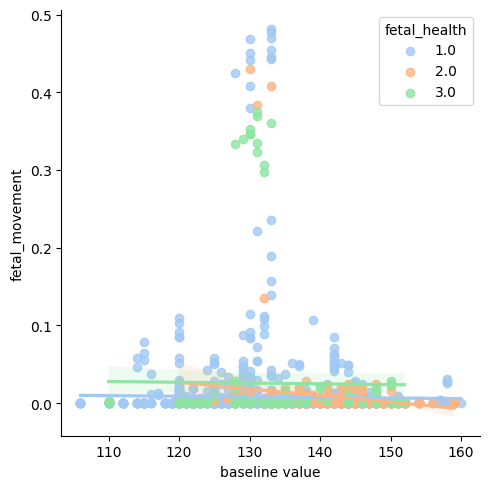

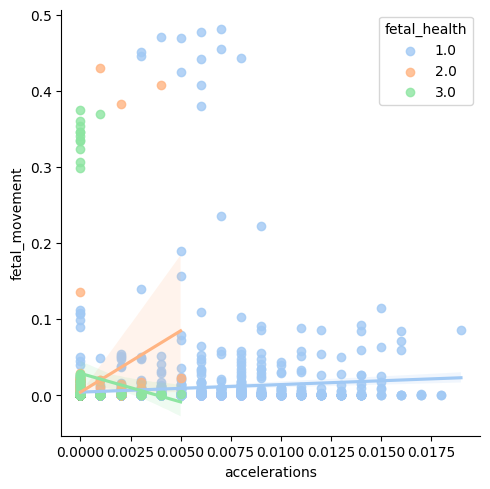

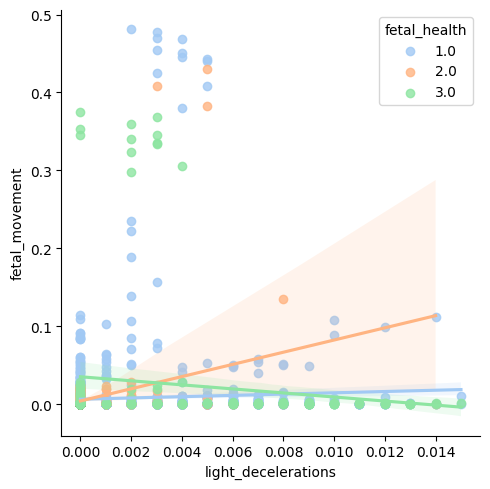

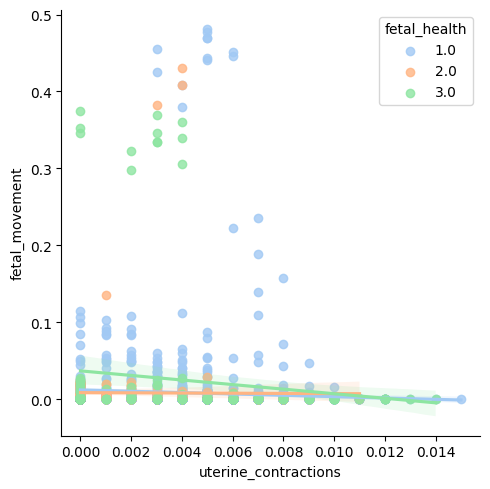

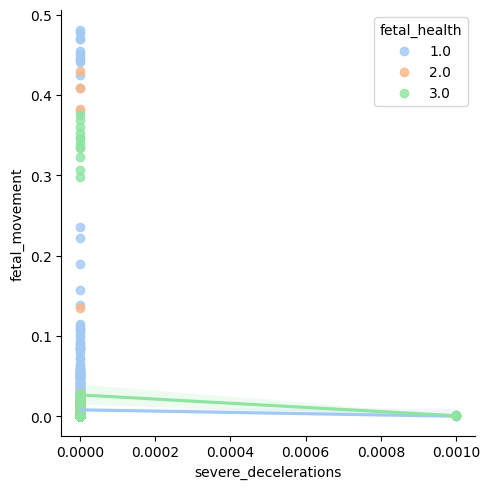

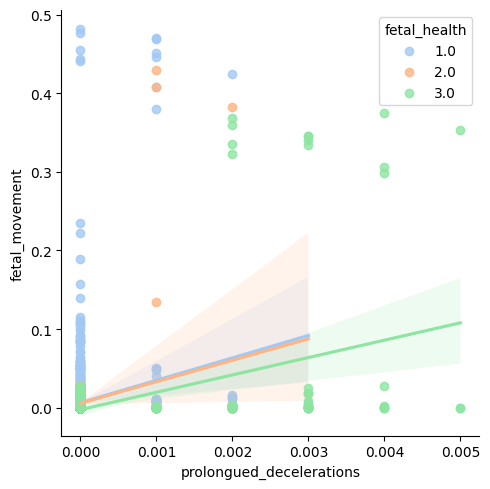

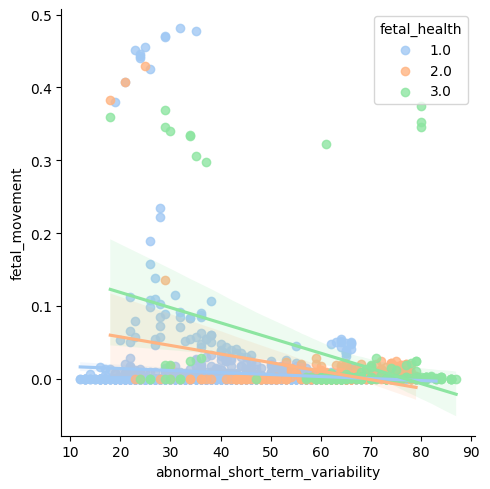

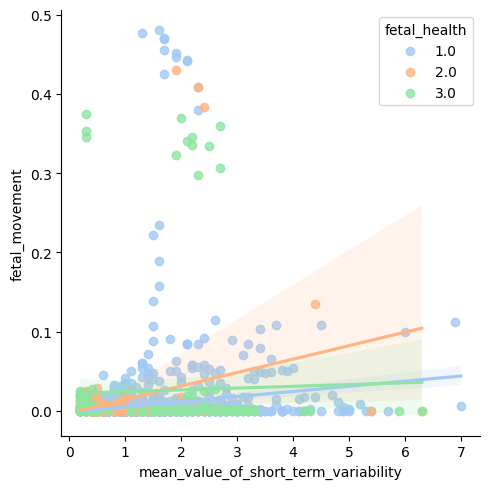

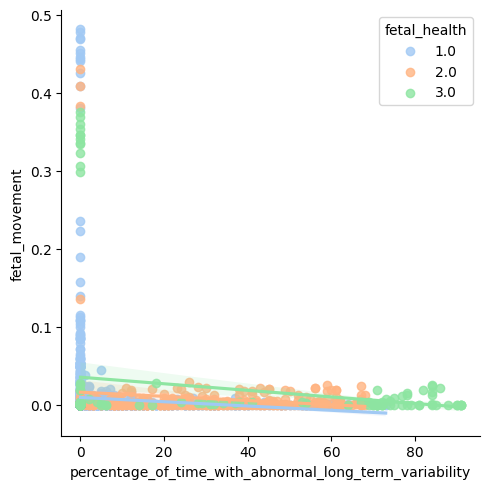

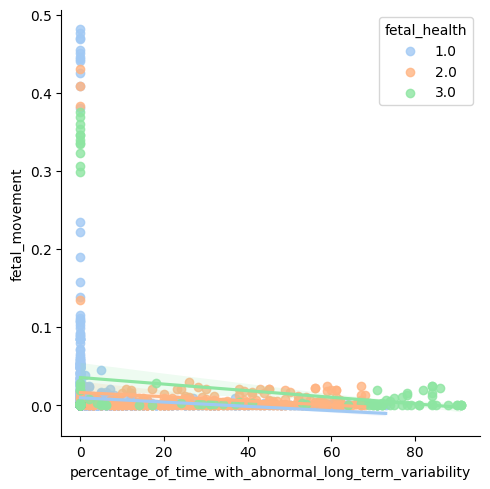

In [ ]:
#Ahora bien, miraremos la correlación de la variable dependiente con las independientes de forma gráfica
#seleccionamos las variables independientes

sns.lmplot(data = FetalHealth,x = 'baseline value', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'accelerations', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'light_decelerations', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'uterine_contractions', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'severe_decelerations', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'prolongued_decelerations', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'abnormal_short_term_variability', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'mean_value_of_short_term_variability', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'percentage_of_time_with_abnormal_long_term_variability', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)
sns.lmplot(data = FetalHealth,x = 'percentage_of_time_with_abnormal_long_term_variability', y = 'fetal_movement',palette=color, hue="fetal_health",legend_out=False)

plt.show()

In [ ]:
FetalHealth['fetal_health'].replace((1.0,2.0,3.0),('normal','sospecha','patologico'),inplace =True)

In [ ]:
# Separamos las variables a predecir y las predictoras
X = FetalHealth.iloc[:,1:11]  #Seleccionamos todas las filas desde la columna 1 a la 11

Y = FetalHealth.iloc[:,0] #Seleccionamos todas las filas de la columna 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.75, random_state =0) #El 75% de los datos se van a utilizar para restar y el 25% para testear
 # Vamos a llamr al constructor del modelo en 5 niveles de clasificación
arbol = DecisionTreeClassifier(max_depth= 5)

#Creamos el modelo
tree_fetal_healt = arbol.fit(X_train, Y_train)

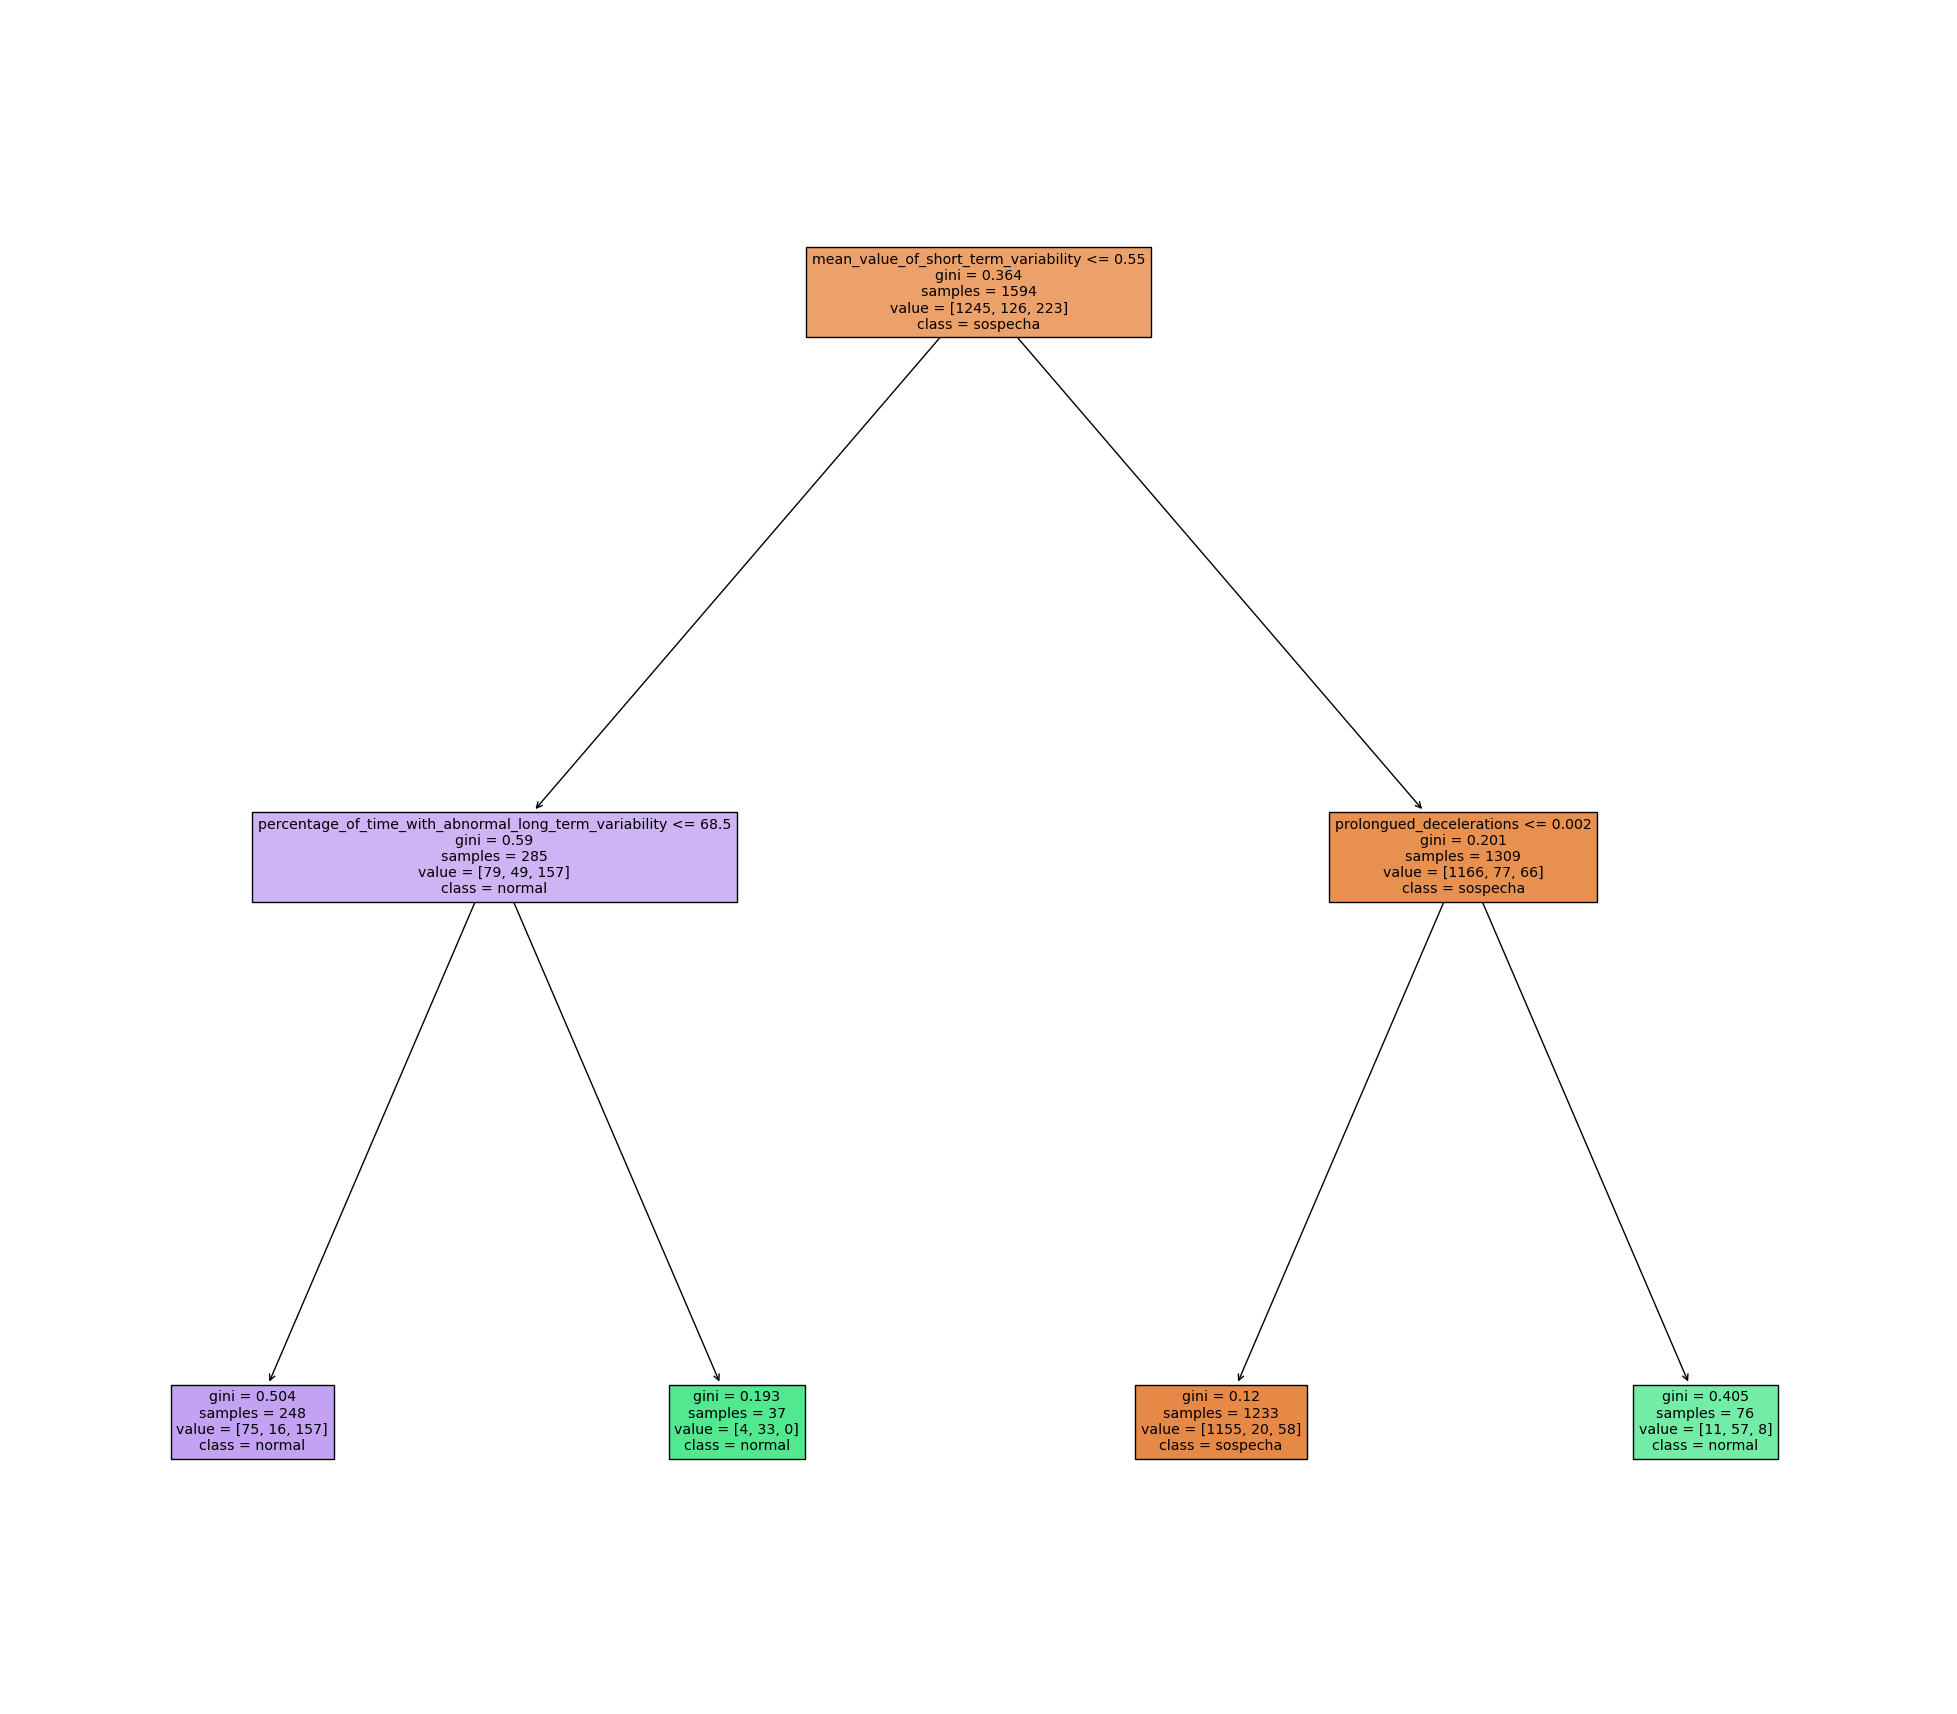

In [ ]:
#Graficamos el árbol
arb = plt.figure(figsize =(25,22))
tree.plot_tree(tree_fetal_healt, feature_names= list(X.columns.values), class_names = list(Y.values), filled =True)
plt.show()
#En este caso se realia un árbol de clasificación con una medida de GINI el cual nos muestra que para la última hoja el nivel de pureza es en promedio 0

In [ ]:
#Evaluamos el modelo
Y_pred = tree_fetal_healt.predict(X_test)
Y_pred

array(['normal', 'normal', 'normal', 'sospecha', 'sospecha', 'normal',
       'normal', 'normal', 'normal', 'sospecha', 'sospecha', 'normal',
       'normal', 'normal', 'normal', 'normal', 'patologico', 'normal',
       'normal', 'sospecha', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'sospecha', 'normal', 'sospecha',
       'normal', 'normal', 'normal', 'normal', 'sospecha', 'normal',
       'sospecha', 'normal', 'patologico', 'normal', 'sospecha',
       'sospecha', 'normal', 'normal', 'sospecha', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'sospecha', 'normal',
       'sospecha', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'sospecha', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal

In [ ]:
#Matriz de confusión
Matrix_C = confusion_matrix(Y_test,Y_pred)
Matrix_C

array([[382,   4,  24],
       [  8,  32,  10],
       [ 26,   2,  44]])

In [ ]:
#Presición Gobal del modelo
Precision_Global = np.sum(Matrix_C.diagonal())/np.sum(Matrix_C)
Precision_Global
#Como se puede observar la presicón global del modelo es de 86,09%, lo cual se puede observar en el árbol de clasificación
# donde el indice de Gini era cercano a cero o cero, esto indica el nivel de pureza del nodo

0.8609022556390977

In [ ]:
# Ahora precisión normal  
#División entre fetos que predijo como normales en posicion [0,10, entre aquellos que estan normales en la primera fila
Precision_Normal = ((Matrix_C[ 0,0]))/sum(Matrix_C[ 0,]) 
Precision_Normal
 


0.9317073170731708

In [ ]:
#Dividisión entre cantidad de fetos que predijo sospecha [0,1], entre aquellos que estan en sospecha en la segunda fila
Presicion_Sospecha = ((Matrix_C[0,1]))/sum(Matrix_C[1,])
Presicion_Sospecha

0.08

In [ ]:

#Dividisión entre cantidad de fetos que predijo Patológico [0,2], entre aquellos que son Patológicos en la tercera fila
Precision_Patologico = ((Matrix_C[0,2]))/sum(Matrix_C[ 2,])
Precision_Patologico

0.3333333333333333

In [ ]:
#por otro lado, el árbol con entropía es
arbol_decision = tree.DecisionTreeClassifier(criterion="entropy") #Con este metodo se max los iveles a utilizar, criterio de clasificación el que tiene mas entropia
# Ajuste condiciones y construya modelo
ar = arbol_decision.fit(X_train,Y_train)
accuracy = arbol_decision.score(X_test, Y_test) #pemite medir que tantas veces clasifica una instancia correctamente clase= fealth_healt
print(accuracy)
#De todas las veces que hace la clasificación el 91,16% de veces lo hace bien

0.9116541353383458


En la investigación realizada anteriormente, se realizo un exploratorio inical de datos relacionando las variables independientes con el movimiento fetal, con el fin de evidenciar la correlación de estos y la salud fetal, en alfunos casos como las aceleraciones representaban un factor importante en la determinación de la salud fetal. 

Continuo a esto, se llevo a cabo un árbol de decisión inicialmente con 5 niveles teniendo en cuenta 'mean_value_of_short_term_variability' como nodo inicial y el GINI como referencia, de este conjunto de atos se pudo evidenciar que el GINI se reduce hasta cero al llegar a la última rama, donde los nodos estan más depurados, son puros y la precisión del modelo es de 86%.

Por último, se cambia el criterio de clasificación a entropía y se máximiza el número de niveles para lograr una buena clasificación, a través de este método se halla que de todas las veces que casifica el árbol la salud del feto, el 91,16% de las veces lo hace bien.
